In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import seaborn as sns

# **training_data_with_weather_info_week_1**



In [ ]:
data1=pd.read_csv("/content/training_data_with_weather_info_week_1.csv")

In [ ]:
data1.head()

,Id,Province/State,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,day_from_jan_first,temp,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,NaN,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,22,42.6,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,NaN,Afghanistan,33.0,65.0,2020-01-23,0.0,0.0,23,42.0,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,NaN,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,24,40.1,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,NaN,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,25,46.0,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,NaN,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,26,42.8,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


# Dealing with missing data

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17892 entries, 0 to 17891
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  17892 non-null  int64  
 1   Province/State      8190 non-null   object 
 2   Country/Region      17892 non-null  object 
 3   Lat                 17892 non-null  float64
 4   Long                17892 non-null  float64
 5   Date                17892 non-null  object 
 6   ConfirmedCases      17892 non-null  float64
 7   Fatalities          17892 non-null  float64
 8   day_from_jan_first  17892 non-null  int64  
 9   temp                17892 non-null  float64
 10  min                 17755 non-null  float64
 11  max                 17876 non-null  float64
 12  stp                 17892 non-null  float64
 13  slp                 10945 non-null  float64
 14  dewp                17274 non-null  float64
 15  rh                  17274 non-null  float64
 16  ah  

In [ ]:
data1.isnull().sum()

Id                       0
Province/State        9702
Country/Region           0
Lat                      0
Long                     0
Date                     0
ConfirmedCases           0
Fatalities               0
day_from_jan_first       0
temp                     0
min                    137
max                     16
stp                      0
slp                   6947
dewp                   618
rh                     618
ah                     618
wdsp                     0
prcp                     0
fog                      0
dtype: int64

In [ ]:
data1.drop(columns=["ah"],inplace=True)

In [ ]:
data1.isnull().sum()

Id                       0
Province/State        9702
Country/Region           0
Lat                      0
Long                     0
Date                     0
ConfirmedCases           0
Fatalities               0
day_from_jan_first       0
temp                     0
min                    137
max                     16
stp                      0
slp                   6947
dewp                   618
rh                     618
wdsp                     0
prcp                     0
fog                      0
dtype: int64

In [ ]:
data1["rh"].describe()

count    17274.000000
mean         0.665443
std          0.191092
min          0.053782
25%          0.560904
50%          0.704800
75%          0.801220
max          1.000000
Name: rh, dtype: float64

In [ ]:
data1["rh"]=data1["rh"].fillna(data1["rh"].median())

In [ ]:
data1['dewp'].describe()

count    17274.000000
mean        42.353630
std         22.399517
min        -33.100000
25%         27.000000
50%         40.800000
75%         63.500000
max         81.100000
Name: dewp, dtype: float64

In [ ]:
data1['dewp']=data1['dewp'].fillna(data1['dewp'].median())

In [ ]:
data1["min"].describe()

count    17755.000000
mean        45.630262
std         22.900739
min        -45.400000
25%         30.200000
50%         44.400000
75%         67.500000
max         88.200000
Name: min, dtype: float64

In [ ]:
data1["max"].describe()

count    17876.000000
mean        64.380191
std         22.310919
min        -23.800000
25%         47.500000
50%         64.800000
75%         84.600000
max        109.600000
Name: max, dtype: float64

In [ ]:
data1.drop(columns=["min","max"],inplace=True)

In [ ]:
data1.isnull().sum()

Id                       0
Province/State        9702
Country/Region           0
Lat                      0
Long                     0
Date                     0
ConfirmedCases           0
Fatalities               0
day_from_jan_first       0
temp                     0
stp                      0
slp                   6947
dewp                     0
rh                       0
wdsp                     0
prcp                     0
fog                      0
dtype: int64

In [ ]:
total_cells_slp=np.product(data1['slp'].shape)
total_missing_slp=data1['slp'].isnull().sum().sum()
print(total_missing_slp)
precentage_missing_slp=(total_missing_slp / total_cells_slp) * 100
print(precentage_missing_slp)

6947
38.82740889783143


In [ ]:
data1["slp"].describe()

count    10945.000000
mean      1016.581023
std          8.490953
min        968.900000
25%       1011.300000
50%       1016.000000
75%       1021.600000
max       1051.700000
Name: slp, dtype: float64

In [ ]:
data1['slp']=data1['slp'].fillna(data1['slp'].median())

In [ ]:
total_cells_PS=np.product(data1['Province/State'].shape)
total_missing_PS=data1['Province/State'].isnull().sum().sum()
print(total_missing_PS)
precentage_missing_PS=(total_missing_PS / total_cells_PS) * 100
print(precentage_missing_PS)

9702
54.22535211267606


In [ ]:
data1.drop(columns=['Province/State'],inplace=True)

In [ ]:
data1.drop(columns=['day_from_jan_first'],inplace=True)

In [ ]:
data1.isnull().sum()

Id                0
Country/Region    0
Lat               0
Long              0
Date              0
ConfirmedCases    0
Fatalities        0
temp              0
stp               0
slp               0
dewp              0
rh                0
wdsp              0
prcp              0
fog               0
dtype: int64

In [ ]:
z_scores=np.abs((data1-data1.mean()))/data1.std()
threshold=3
outliers=(z_scores > threshold).any(axis=1)
cleand_data=data1[~outliers]
print("orginal Data")
print(data1)
print("Data after removing outliers")
print(cleand_data)

orginal Data
          Id Country/Region      Lat     Long        Date  ConfirmedCases  \
0          1    Afghanistan  33.0000  65.0000  2020-01-22             0.0   
1          2    Afghanistan  33.0000  65.0000  2020-01-23             0.0   
2          3    Afghanistan  33.0000  65.0000  2020-01-24             0.0   
3          4    Afghanistan  33.0000  65.0000  2020-01-25             0.0   
4          5    Afghanistan  33.0000  65.0000  2020-01-26             0.0   
...      ...            ...      ...      ...         ...             ...   
17887  26378         Zambia -15.4167  28.2833  2020-03-20             2.0   
17888  26379         Zambia -15.4167  28.2833  2020-03-21             2.0   
17889  26380         Zambia -15.4167  28.2833  2020-03-22             3.0   
17890  26381         Zambia -15.4167  28.2833  2020-03-23             3.0   
17891  26382         Zambia -15.4167  28.2833  2020-03-24             3.0   

       Fatalities  temp    stp     slp  dewp        rh  wdsp  

<ipython-input-23-d5e16b5b138f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores=np.abs((data1-data1.mean()))/data1.std()
<ipython-input-23-d5e16b5b138f>:1: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  z_scores=np.abs((data1-data1.mean()))/data1.std()


# **Continent (Lat,Long)Columns without Nans**

In [ ]:
!pip install pycountry_convert


In [ ]:
import pycountry_convert as pc

def country_continent(column):
    Continent=[]
    for country in column:
        try:
            country_code = pc.country_name_to_country_alpha2(country, cn_name_format="default")
            continent_code = pc.country_alpha2_to_continent_code(country_code)
            country_continent_name = pc.convert_continent_code_to_continent_name(continent_code)
            Continent.append(country_continent_name)
        except:
            Continent.append(None)

    return Continent


cleand_data['Continent']=country_continent(cleand_data['Country/Region'])
cleand_data.head()

/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's official_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
/usr/local/lib/python3.10/dist-packages/pycountry/db.py:51: UserWarning: Country's common_name not found. Country name provided instead.
  warnings.warn(warning_message, UserWarning)
<ipython-input-25-a89851f1413c>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleand_data['Continent']=country_continent(cleand_data['Country/Region'])


,Id,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,temp,stp,slp,dewp,rh,wdsp,prcp,fog,Continent
0,1,Afghanistan,33.0,65.0,2020-01-22,0.0,0.0,42.6,999.9,1024.3,27.4,0.545709,9.4,0.00,0,Asia
2,3,Afghanistan,33.0,65.0,2020-01-24,0.0,0.0,40.1,999.9,1018.6,34.5,0.801794,10.4,0.17,1,Asia
3,4,Afghanistan,33.0,65.0,2020-01-25,0.0,0.0,46.0,999.9,1018.0,37.8,0.728175,6.1,0.57,1,Asia
4,5,Afghanistan,33.0,65.0,2020-01-26,0.0,0.0,42.8,999.9,1014.8,33.2,0.685513,10.8,0.00,1,Asia
5,6,Afghanistan,33.0,65.0,2020-01-27,0.0,0.0,43.0,999.9,1015.7,35.6,0.748685,3.7,0.04,0,Asia


In [ ]:
cleand_data['Continent'].isnull().sum()

3891

In [ ]:
cleand_data['Country/Region'].isnull().sum()

0

In [ ]:
Nans=cleand_data.loc[:,["Continent","Country/Region"]]
Nans["Country/Region"].isnull().sum()

0

In [ ]:
list_CR=Nans.loc[:,"Country/Region"].to_list()
# print(list_CR)
for cell in range(len(list_CR)-1):
  if list_CR[cell]=='Congo (Brazzaville)' or list_CR[cell]=='Congo (Kinshasa)' or list_CR[cell]=="Cote d'Ivoire" or list_CR[cell]=='The Gambia'or list_CR[cell]=='Reunion' or list_CR[cell]== 'Gambia, The':
    list_CR[cell]="Africa"
  elif list_CR[cell]=='Holy See'or list_CR[cell]=='Kosovo':
    list_CR[cell]="Europe"
  elif list_CR[cell]=='Korea, South'or list_CR[cell]=='Taiwan*':
    list_CR[cell]="Asia"
  elif list_CR[cell]=='The Bahamas'or list_CR[cell]=='US':
    list_CR[cell]="North America"

print(list_CR)

['Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Afghanistan', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Albania', 'Al

In [ ]:
Nans['Country/Region']=list_CR
Nans

,Continent,Country/Region
0,Asia,Afghanistan
2,Asia,Afghanistan
3,Asia,Afghanistan
4,Asia,Afghanistan
5,Asia,Afghanistan
...,...,...
17885,Africa,Zambia
17886,Africa,Zambia
17887,Africa,Zambia
17890,Africa,Zambia


In [ ]:
Nans['Continent']=Nans['Continent'].fillna(Nans['Country/Region'])
Nans.isnull().sum()

Continent         0
Country/Region    0
dtype: int64

In [ ]:
cleand_data['Continent']=Nans['Continent']
cleand_data

<ipython-input-32-6e1261eb1652>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleand_data['Continent']=Nans['Continent']


,Id,Country/Region,Lat,Long,Date,ConfirmedCases,Fatalities,temp,stp,slp,dewp,rh,wdsp,prcp,fog,Continent
0,1,Afghanistan,33.0000,65.0000,2020-01-22,0.0,0.0,42.6,999.9,1024.3,27.4,0.545709,9.4,0.00,0,Asia
2,3,Afghanistan,33.0000,65.0000,2020-01-24,0.0,0.0,40.1,999.9,1018.6,34.5,0.801794,10.4,0.17,1,Asia
3,4,Afghanistan,33.0000,65.0000,2020-01-25,0.0,0.0,46.0,999.9,1018.0,37.8,0.728175,6.1,0.57,1,Asia
4,5,Afghanistan,33.0000,65.0000,2020-01-26,0.0,0.0,42.8,999.9,1014.8,33.2,0.685513,10.8,0.00,1,Asia
5,6,Afghanistan,33.0000,65.0000,2020-01-27,0.0,0.0,43.0,999.9,1015.7,35.6,0.748685,3.7,0.04,0,Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17885,26376,Zambia,-15.4167,28.2833,2020-03-18,2.0,0.0,69.1,999.9,1016.0,62.4,0.790664,5.3,0.00,0,Africa
17886,26377,Zambia,-15.4167,28.2833,2020-03-19,2.0,0.0,71.0,999.9,1016.0,61.4,0.714656,4.6,0.00,0,Africa
17887,26378,Zambia,-15.4167,28.2833,2020-03-20,2.0,0.0,70.6,999.9,1016.0,62.8,0.761545,6.0,0.00,0,Africa
17890,26381,Zambia,-15.4167,28.2833,2020-03-23,3.0,0.0,71.7,999.9,1016.0,62.8,0.733343,4.2,0.00,0,Africa


In [ ]:
cleand_data['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', 'Cruise Ship'], dtype=object)

In [ ]:
cleand_data["Continent"].value_counts()

North America    4849
Asia             4095
Europe           3053
Africa           2133
South America     792
Oceania           689
Cruise Ship        63
Name: Continent, dtype: int64

In [ ]:
cleand_data.isnull().sum()

Id                0
Country/Region    0
Lat               0
Long              0
Date              0
ConfirmedCases    0
Fatalities        0
temp              0
stp               0
slp               0
dewp              0
rh                0
wdsp              0
prcp              0
fog               0
Continent         0
dtype: int64

# **Data Visulization**

In [ ]:
cor=cleand_data.corr()

<ipython-input-36-4c7e1d8bcf1f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=cleand_data.corr()


<Axes: >

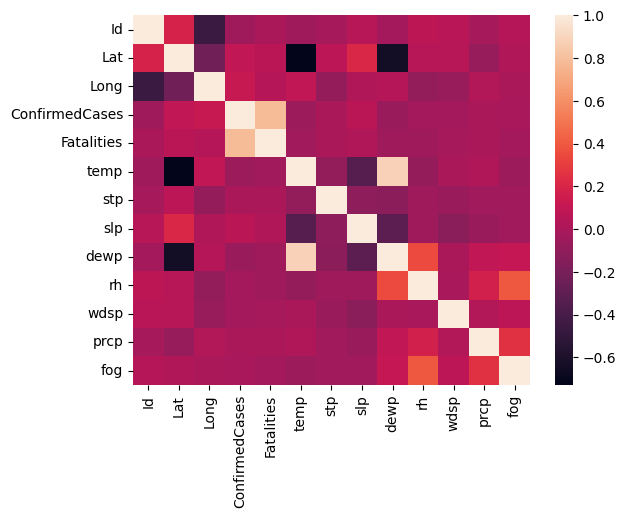

In [ ]:
sns.heatmap(cor)

In [ ]:
px.scatter(cleand_data,x='temp',y="dewp")

In [ ]:
px.scatter(cleand_data,x='Date',y="ConfirmedCases",color="Fatalities")

In [ ]:
px.scatter(cleand_data,x="Country/Region",y="ConfirmedCases",color='Fatalities',hover_data="Date")

In [ ]:
px.scatter(cleand_data,x='fog',y="rh")

In [ ]:
px.scatter(cleand_data,x='dewp',y="rh",color="temp",hover_data="Continent")

In [ ]:
px.scatter(cleand_data,x="Continent",y="ConfirmedCases",color="temp",size="Id")

In [ ]:
cleand_data.drop(columns=["Lat",'Long'],inplace=True)

<ipython-input-44-ace188ff37aa>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
cleand_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15674 entries, 0 to 17891
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              15674 non-null  int64  
 1   Country/Region  15674 non-null  object 
 2   Date            15674 non-null  object 
 3   ConfirmedCases  15674 non-null  float64
 4   Fatalities      15674 non-null  float64
 5   temp            15674 non-null  float64
 6   stp             15674 non-null  float64
 7   slp             15674 non-null  float64
 8   dewp            15674 non-null  float64
 9   rh              15674 non-null  float64
 10  wdsp            15674 non-null  float64
 11  prcp            15674 non-null  float64
 12  fog             15674 non-null  int64  
 13  Continent       15674 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 2.3+ MB


# **Dashboard**

In [ ]:
!pip install dash

In [ ]:
!pip install jupyter-dash

In [ ]:
from jupyter_dash import JupyterDash
import dash_html_components as html
import dash_core_components as dcc
from dash.dependencies import Input,Output

<ipython-input-48-cd2025112555>:2: UserWarning:


The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`

<ipython-input-48-cd2025112555>:3: UserWarning:


The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`



In [ ]:
app=JupyterDash(__name__)
app.layout= html.Div([html.H1("Dashboard with Dropdown & Slider to display Data"),
                      html.Label("**Select a column__"),
                      dcc.Dropdown(id='dropdown',
                                  options=[{'label':x, 'value': x}
                                        for x in cleand_data.loc[:,['Id','Country/Region','Date','temp','stp','slp','dewp','rh','wdsp','prcp','fog','Continent']] ],
                                  value='Date'),
                      html.Label("**Temp (move the slider to change the temperature__)"),
                      dcc.Slider(id='slider',
                                  min=cleand_data['temp'].min(),
                                  max=cleand_data['temp'].max(),
                                  step=1,
                                  marks={date: str(date) for date in cleand_data['temp']},
                                  value=cleand_data['temp'].min()  ),
                      html.Br(),
                      html.Br(),
                      dcc.Graph(id="output-graph1"),
                      dcc.Graph(id="output-graph2"),
                      html.Div(id="output-slider")
])

/usr/local/lib/python3.10/dist-packages/dash/dash.py:550: UserWarning:

JupyterDash is deprecated, use Dash instead.
See https://dash.plotly.com/dash-in-jupyter for more details.



In [ ]:
@app.callback(
    [Output('output-graph1', 'figure'),
     Output('output-graph2', 'figure'),
     Output("output-slider",'children')],
    [Input('dropdown', 'value'),
     Input('slider', 'value')]
)
def update_scatter_plot(selected_value_dropdown,selected_value_slidar):
      filtered_df1 = cleand_data[selected_value_dropdown]
      filtered_df2 =cleand_data[cleand_data['temp'] == selected_value_slidar]
      graph1=px.histogram(cleand_data,x=filtered_df1 , y="ConfirmedCases",color="Continent" ,title=f'Number of people infected by {selected_value_dropdown}')
      graph2=px.scatter(cleand_data,x=filtered_df1 , y="Fatalities",color="Continent" ,title=f'Number of deathes related to {selected_value_dropdown}')
      table=html.Table([
         html.Thead(html.Tr([html.Th(col) for col in filtered_df2.loc[:,["Id","Country/Region","ConfirmedCases","Fatalities","temp","Continent","Date"]]])),
        html.Tbody([html.Tr([html.Td(filtered_df2.iloc[i][col]) for col in filtered_df2.loc[:,["Id","Country/Region","ConfirmedCases","Fatalities","temp","Continent","Date"]]]) for i in range(len(filtered_df2.loc[:,["Id","Country/Region","ConfirmedCases","Fatalities","temp","Continent","Date"]]))])
    ])
      return graph1,graph2,table


In [ ]:
app.run_server(mode="external")

<IPython.core.display.Javascript object>

Dash app running on:


<IPython.core.display.Javascript object>